In [102]:
import pandas

In [103]:
clean_dataset = pandas.read_csv('df_banco_final.csv', sep=';')
clean_dataset.head()

,default,account_check_status,credit_history,savings,present_emp_since,installment_as_income_perc,other_debtors,property,other_installment_plans,housing,credits_this_bank,job,telephone,foreign_worker,estado_civil,rango_valor_credito,rango_plazos_credito,rango_edad
0,0,1,5,1,1,4,1,1,3,2,2,3,1,1,1,2,1,5
1,1,2,3,5,3,2,1,1,3,2,1,3,0,1,0,6,4,1
2,0,4,5,5,2,2,1,1,3,2,1,2,0,1,1,3,1,3
3,0,1,3,5,2,2,3,2,3,3,1,3,0,1,1,8,4,3
4,1,1,4,5,3,3,1,4,3,3,2,3,0,1,1,5,2,4


In [104]:
from sklearn.preprocessing import StandardScaler

In [105]:
#Estandariza la escala de la media y de la desviación estandar y se almacena la función en una variable
norm = StandardScaler()

In [106]:
# X es un DataFrame que contiene todas las columnas del DF excepto la columna 'default'.
x = clean_dataset.drop('default', axis=1)
# Y es una serie que contiene únicamente el valor default
y = clean_dataset['default']

#El método fit_transform se aplica a las características x para ajustar la estandarización y al mismo tiempo transformar las características
x_normalized = norm.fit_transform(x)
#Se almacena el resultado en nueva variable con una media de cero y desviación estandar de 1
x_normalized

array([[-1.06271653,  1.50687935, -2.01779722, ..., -0.62124939,
        -1.05547493,  2.80548   ],
       [-0.25059691, -0.33157912,  0.68482522, ...,  0.79816986,
         1.95811766, -0.85668504],
       [ 1.37364232,  1.50687935,  0.68482522, ..., -0.26639458,
        -1.05547493,  0.97439748],
       ...,
       [-1.06271653, -2.17003758,  0.68482522, ..., -0.62124939,
        -1.05547493, -0.85668504],
       [-0.25059691, -0.33157912,  0.68482522, ..., -0.26639458,
        -0.05094407, -0.85668504],
       [-1.06271653, -0.33157912,  0.68482522, ..., -0.62124939,
        -1.05547493, -0.85668504]])

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
#x_normalized contiene el conjunto de caracteristicas, contra Y que es la variable objetiva 
#test_size=0.3 significa que el 30% de los datos se utilizarán como conjunto de prueba, y el 70% restante se utilizará como conjunto de entrenamiento.
x_train, x_test, y_train, y_test = train_test_split(x_normalized, y, test_size=0.3, random_state=12)

In [109]:
"""El resultado de train_test_split son cuatro conjuntos de datos:

X_train: Conjunto de características para entrenamiento.
X_test: Conjunto de características para pruebas.
y_train: Variable objetivo para entrenamiento.
y_test: Variable objetivo para pruebas."""

'El resultado de train_test_split son cuatro conjuntos de datos:\n\nX_train: Conjunto de características para entrenamiento.\nX_test: Conjunto de características para pruebas.\ny_train: Variable objetivo para entrenamiento.\ny_test: Variable objetivo para pruebas.'

In [110]:
#Importamos el modulo clasificador
from sklearn.ensemble import RandomForestClassifier

In [111]:
#Aplica el clasificador de bosque aleatorio 
rf = RandomForestClassifier()

In [112]:
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)

In [113]:
#Importamos las métricas relacionadas con la evaluación del rendimiento del modelo de clasificación 
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

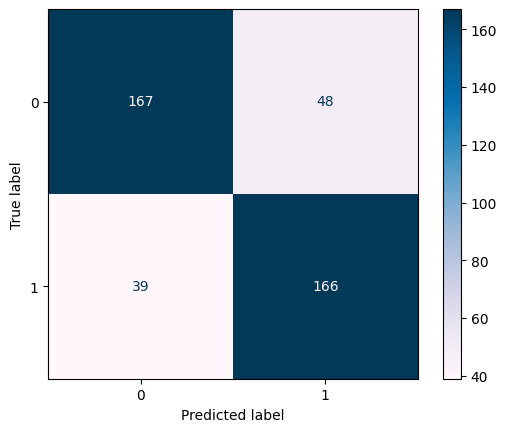

In [114]:
#La variable confmatrix contendrá la matriz de confusión calculada al comparar (y_test) con las predicciones del modelo (predictions).
confmatrix = confusion_matrix(y_test, predictions)
confmatrix

visual_confmatrix = ConfusionMatrixDisplay(confmatrix)

visual_confmatrix.plot(cmap='PuBu')


In [115]:
#calcula las métricas de evaluación del rendimiento de un modelo de clasificación
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
rocauc = roc_auc_score(y_test, predictions)
tn, fp, fn, tp = confmatrix.ravel()
specificity = tn/(tn + fp)

#Creamos un diccionario para almacenar las metricas de evaluación
model_scores = {
  'model': 'RandomForestClassifier',
  'accuracy': accuracy,
  'precision': precision,
  'recall': recall,
  'f1_score': f1,
  'roc_auc_score': rocauc,
  'specificity' : specificity
}
model_scores

{'model': 'RandomForestClassifier',
 'accuracy': 0.7928571428571428,
 'precision': 0.7757009345794392,
 'recall': 0.8097560975609757,
 'f1_score': 0.7923627684964201,
 'roc_auc_score': 0.7932501418037436,
 'specificity': 0.7767441860465116}

In [116]:
#Mejorando el modelo de predicción
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

In [117]:
kfolds = KFold(n_splits=10, shuffle=True)

In [118]:
# Definir los parámetros que deseas ajustar
params = {
  'criterion': ['gini', 'entropy', 'log_loss'],
  'max_depth': [10, 20, 30],
  'max_features': ['sqrt', 'log2', None],
  'bootstrap': [True, False],
  'n_estimators': [50, 100, 150],
}

In [119]:
# Inicializar GridSearchCV con el modelo y los parámetros
rf_randomizedSearchCV = RandomizedSearchCV(
  rf,
  params,
  n_iter=162,
  cv=kfolds,
  scoring='accuracy',
  n_jobs=-1
)

In [120]:
# Ajustar el modelo a los datos de entrenamiento
rf_randomized_fit = rf_randomizedSearchCV.fit(x_train, y_train)

In [121]:
# Obtener los mejores parámetros
best_params = rf_randomized_fit.best_params_
print(best_params)

# Obtener el mejor modelo
best_score = rf_randomized_fit.best_score_
print(best_score)

{'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'log_loss', 'bootstrap': False}
0.8306122448979592


In [122]:
rf_optimized = RandomForestClassifier(
  n_estimators= 50, 
  max_features= 'sqrt', 
  max_depth= 30,
  criterion= 'gini',
  bootstrap= True
)
rf_optimized.fit(x_train, y_train)
predictions = rf_optimized.predict(x_test)

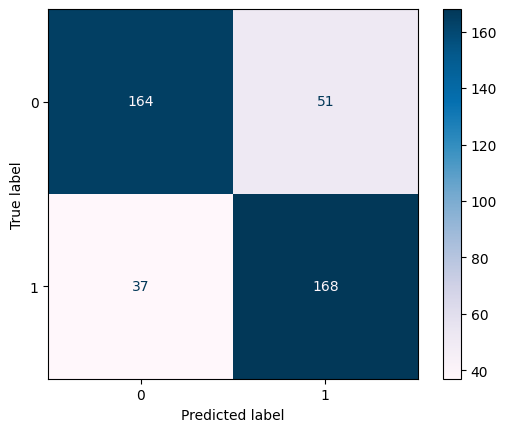

In [123]:
#La variable confmatrix contendrá la matriz de confusión calculada al comparar (y_test) con las predicciones del modelo (predictions).
confmatrix = confusion_matrix(y_test, predictions)
confmatrix

visual_confmatrix = ConfusionMatrixDisplay(confmatrix)

visual_confmatrix.plot(cmap='PuBu')

In [124]:
#calcula las métricas de evaluación del rendimiento de un modelo de clasificación
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
rocauc = roc_auc_score(y_test, predictions)
tn, fp, fn, tp = confmatrix.ravel()
specificity = tn/(tn + fp)

#Creamos un diccionario para almacenar las metricas de evaluación
model_scores = {
  'model': 'RandomForestClassifier',
  'accuracy': accuracy,
  'precision': precision,
  'recall': recall,
  'f1_score': f1,
  'roc_auc_score': rocauc,
  'specificity' : specificity
}
model_scores

{'model': 'RandomForestClassifier',
 'accuracy': 0.7904761904761904,
 'precision': 0.7671232876712328,
 'recall': 0.8195121951219512,
 'f1_score': 0.7924528301886793,
 'roc_auc_score': 0.7911514463981848,
 'specificity': 0.7627906976744186}

In [125]:
"""#La variable confmatrix contendrá la matriz de confusión calculada al comparar (y_test) con las predicciones del modelo (predictions).
confmatrix = confusion_matrix(y_test, predictions)
confmatrix

confmatrix[0,0]: Verdaderos negativos (TN)
confmatrix[0,1]: Falsos positivos (FP)
confmatrix[1,0]: Falsos negativos (FN)
confmatrix[1,1]: Verdaderos positivos (TP)

#fig, ax = plt.subplots(figsize=(8, 8))
visual_confmatrix = ConfusionMatrixDisplay(confmatrix)

visual_confmatrix.plot(cmap='PuBu') #ax=ax)

Añade anotaciones de los valores en la matriz de confusión
for i in range(confmatrix.shape[0]):
    for j in range(confmatrix.shape[1]):
        ax.text(j, i, f"{confmatrix[i, j]:,}\n{['Verdaderos Negativos', 'Falsos Positivos', 'Falsos Negativos', 'Verdaderos Positivos'][i + j * 2]}", 
                ha='center', va='center', color='red' if i != j else 'white')
              


                plt.show()  """

'#La variable confmatrix contendrá la matriz de confusión calculada al comparar (y_test) con las predicciones del modelo (predictions).\nconfmatrix = confusion_matrix(y_test, predictions)\nconfmatrix\n\nconfmatrix[0,0]: Verdaderos negativos (TN)\nconfmatrix[0,1]: Falsos positivos (FP)\nconfmatrix[1,0]: Falsos negativos (FN)\nconfmatrix[1,1]: Verdaderos positivos (TP)\n\n#fig, ax = plt.subplots(figsize=(8, 8))\nvisual_confmatrix = ConfusionMatrixDisplay(confmatrix)\n\nvisual_confmatrix.plot(cmap=\'PuBu\') #ax=ax)\n\nAñade anotaciones de los valores en la matriz de confusión\nfor i in range(confmatrix.shape[0]):\n    for j in range(confmatrix.shape[1]):\n        ax.text(j, i, f"{confmatrix[i, j]:,}\n{[\'Verdaderos Negativos\', \'Falsos Positivos\', \'Falsos Negativos\', \'Verdaderos Positivos\'][i + j * 2]}", \n                ha=\'center\', va=\'center\', color=\'red\' if i != j else \'white\')\n              \n\n\n                plt.show()  '

In [126]:
#Definimos una función para guardar el resultado
def save_scores(model_scores: dict):
  status = []
  #Utilizamos un try-except en caso de que el archivo no exista que cree uno
  try:
    #Si el archivo existe continúa por acá
    scores = pandas.read_csv('scores.csv', sep=';')
    status.append('El archivo existe')
    exist = model_scores['model'] in scores['model'].values
    #Validamos si el modelo ya existe en el archivo de scores
    if (exist):
      #Si el modelo ya existe reemplazamos sus valores
      status.append('El modelo existe')
      criteria = scores['model'] == model_scores['model']
      index = scores[criteria].index[0]
      scores.iloc[index] = model_scores
      status.append('Se reemplazaron los valores del modelo')
    else:
      #Si el modelo no existe lo agregamos
      status.append('El modelo no existe')
      df_model_scores = pandas.DataFrame(model_scores, index=[0])
      scores = pandas.concat([scores, df_model_scores], ignore_index=True)
      status.append('Se añadió modelo nuevo y sus valores')
  except:
    #Si no existe el archivo lo creamos y cargamos los scores del modelo
    status.append('El archivo no existe')
    scores = pandas.DataFrame(model_scores, index=[0])

  status.append('Se sobrescrive el archivo scores.csv con valores nuevos')
  scores.to_csv('scores.csv', sep=';', index=False)
  return status

In [127]:
save_scores(model_scores)

['El archivo existe',
 'El modelo existe',
 'Se reemplazaron los valores del modelo',
 'Se sobrescrive el archivo scores.csv con valores nuevos']